<a href="https://colab.research.google.com/github/Nathy-M/Nathy-M/blob/main/Transfer_Learning_Using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers

pre_trained_model = ResNet50(input_shape = (150,150,3),
                                include_top = False,
                                weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [30]:
last_layer = pre_trained_model.get_layer('conv4_block1_3_conv') #
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 10, 10, 1024)


In [31]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = tf.keras.layers.Flatten()(last_output)
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate = 0.0001), metrics = ['accuracy'])

In [33]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np

!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall('tmp/')

zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'

print('directories inside of base_dir', os.listdir(base_dir))
print('directories in train')
print(os.listdir(f'{base_dir}/train'))

print('directories in validation')
print(os.listdir(f'{base_dir}/validation'))

--2022-11-08 12:41:19--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M  20.9MB/s    in 3.8s    

2022-11-08 12:41:24 (17.2 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]

directories inside of base_dir ['train', 'validation', 'vectorize.py']
directories in train
['cats', 'dogs']
directories in validation
['cats', 'dogs']


In [34]:
train = os.path.join(base_dir, 'train')
validation = os.path.join(base_dir, 'validation')

train_cats = os.path.join(train, 'cats')
train_dogs = os.path.join(train, 'dogs')

validation_cats = os.path.join(train, 'cats')
validation_dogs = os.path.join(train, 'dogs')

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 21s - loss: 1.1034 - accuracy: 0.4960 - val_loss: 0.8247 - val_accuracy: 0.5000 - 21s/epoch - 206ms/step
Epoch 2/20
100/100 - 18s - loss: 0.7683 - accuracy: 0.5350 - val_loss: 0.6909 - val_accuracy: 0.5000 - 18s/epoch - 182ms/step
Epoch 3/20
100/100 - 18s - loss: 0.7843 - accuracy: 0.5085 - val_loss: 0.7241 - val_accuracy: 0.5000 - 18s/epoch - 183ms/step
Epoch 4/20
100/100 - 18s - loss: 0.7719 - accuracy: 0.5085 - val_loss: 0.7946 - val_accuracy: 0.5010 - 18s/epoch - 181ms/step
Epoch 5/20
100/100 - 18s - loss: 0.7574 - accuracy: 0.5350 - val_loss: 0.6729 - val_accuracy: 0.5270 - 18s/epoch - 181ms/step
Epoch 6/20
100/100 - 18s - loss: 0.7676 - accuracy: 0.5155 - val_loss: 0.7584 - val_accuracy: 0.5000 - 18s/epoch - 180ms/step
Epoch 7/20
100/100 - 18s - loss: 0.7791 - accuracy: 0.5155 - val_loss: 0.7823 - val_accuracy: 0.5000 - 18s/epoch - 178ms/step
Epoch 8/20
100/100 - 18s - loss: 0.7467 - accuracy: 0.5280 - val_loss: 0.6746 - val_accuracy: 0.5630 - 18s/epoch - 178

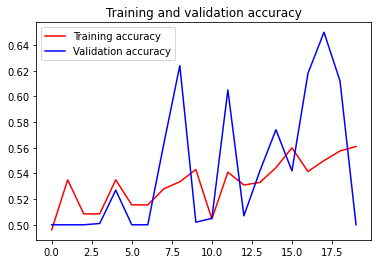

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()